# **1. Install Library**

In [3]:
# ! pip install mlxtend==0.21.0

In [4]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [7]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [8]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='خمحرکه')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Nirou.Moharreke,5,2011/03/26,1390/01/06,9036,4235,4558.0,4235.0,4486,421443905,...,400,334,4.671876,0.081305,6.321622,23756.3,21.752513,1.156180e+05,125.446358,10384
1,Nirou.Moharreke,5,2011/03/27,1390/01/07,9037,4660,4660.0,4309.0,4503,128258629,...,400,334,4.671876,0.081305,6.321622,24199.8,21.825323,1.106293e+05,125.822496,10384
2,Nirou.Moharreke,5,2011/03/28,1390/01/08,9038,4330,4500.0,4325.0,4449,244915985,...,400,334,4.671876,0.081305,6.321622,24287.8,21.897961,1.056489e+05,126.199369,10392
3,Nirou.Moharreke,5,2011/03/29,1390/01/09,9039,4550,4550.0,4280.0,4417,244403780,...,400,334,4.671876,0.081305,6.321622,24486.6,21.970427,1.006767e+05,126.576979,10394
4,Nirou.Moharreke,5,2011/03/30,1390/01/10,9040,4275,4450.0,4275.0,4390,186358348,...,400,334,4.671876,0.081305,6.321622,24486.0,22.042720,9.571276e+04,127.714220,10400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,Nirou.Moharreke,5,2022/03/13,1400/12/22,11488,2921,2921.0,2730.0,2780,30132163279,...,31,307,9.309446,0.122621,7.157544,1335376.4,30.096101,1.167731e+07,121.357388,42000
2453,Nirou.Moharreke,5,2022/03/14,1400/12/23,11489,2780,2880.0,2730.0,2779,17479275229,...,31,307,9.309446,0.122621,7.157544,1334776.9,29.929022,1.167140e+07,122.463734,42000
2454,Nirou.Moharreke,5,2022/03/15,1400/12/24,11490,2818,2900.0,2700.0,2817,29845138027,...,31,307,9.309446,0.122621,7.157544,1337223.2,29.761546,1.166546e+07,122.833988,42000
2455,Nirou.Moharreke,5,2022/03/16,1400/12/25,11491,2939,2957.0,2934.0,2955,29587792464,...,31,307,9.309446,0.122621,7.157544,1345018.2,29.593672,1.165950e+07,123.204977,42000


# **3. Preproceesing Data**

In [9]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                   1
تورم                      3
طلا                       3
نفت                       3
دلار                      0
dtype: int64

In [15]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,4235,4558.0,4235.0,421443905,92945,31,4558,0.0,0.000000,0.000000,...,334,4.671876,0.081305,6.321622,23756.3,21.752513,1.156180e+05,125.446358,10384,4486
1,4660,4660.0,4309.0,128258629,28070,11,4500,0.0,0.000000,0.000000,...,334,4.671876,0.081305,6.321622,24199.8,21.825323,1.106293e+05,125.822496,10384,4503
2,4330,4500.0,4325.0,244915985,56032,20,4350,0.0,0.000000,0.000000,...,334,4.671876,0.081305,6.321622,24287.8,21.897961,1.056489e+05,126.199369,10392,4449
3,4550,4550.0,4280.0,244403780,55921,21,4490,0.0,0.000000,0.000000,...,334,4.671876,0.081305,6.321622,24486.6,21.970427,1.006767e+05,126.576979,10394,4417
4,4275,4450.0,4275.0,186358348,43018,13,4350,4449.6,0.000000,0.000000,...,334,4.671876,0.081305,6.321622,24486.0,22.042720,9.571276e+04,127.714220,10400,4390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2921,2921.0,2730.0,30132163279,10837717,795,2770,2901.0,2979.166667,2866.730769,...,307,9.309446,0.122621,7.157544,1335376.4,30.096101,1.167731e+07,121.357388,42000,2780
2453,2780,2880.0,2730.0,17479275229,6290394,564,2747,2860.4,2954.583333,2864.692308,...,307,9.309446,0.122621,7.157544,1334776.9,29.929022,1.167140e+07,122.463734,42000,2779
2454,2818,2900.0,2700.0,29845138027,10594157,855,2821,2846.8,2941.916667,2865.115385,...,307,9.309446,0.122621,7.157544,1337223.2,29.761546,1.166546e+07,122.833988,42000,2817
2455,2939,2957.0,2934.0,29587792464,10013451,488,2957,2832.2,2931.666667,2875.192308,...,307,9.309446,0.122621,7.157544,1345018.2,29.593672,1.165950e+07,123.204977,42000,2955


In [16]:
data_final=data_main_pre

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2457.00,2457.00,2457.00,2.457000e+03,2.457000e+03,2457.0,2457.00,2457.00,2457.00,2457.00,...,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00
mean,3538.85,3605.81,3470.65,4.643629e+10,5.721127e+06,869.5,3532.84,3526.77,3516.37,3495.09,...,128.29,59.38,0.05,6.57,321345.48,28.05,3761546.89,70.30,30864.75,3541.36
std,5158.21,5237.90,5087.11,2.996692e+11,1.786758e+07,4006.0,5184.72,5106.42,5029.87,4902.45,...,175.94,89.94,0.06,0.29,492930.77,17.27,4046901.28,30.57,10984.57,5134.66
min,0.00,775.00,762.00,8.640000e+03,5.000000e+00,1.0,762.00,0.00,0.00,0.00,...,-294.00,-3.33,-0.08,6.29,0.00,0.00,0.00,0.00,10384.00,786.00
25%,1549.00,1579.00,1515.00,4.807828e+08,2.888140e+05,45.0,1548.00,1544.00,1545.33,1528.23,...,45.00,5.36,0.01,6.32,63496.50,12.50,1005000.00,49.73,24962.00,1556.00
50%,2111.00,2150.00,2070.00,2.247624e+09,1.055453e+06,166.0,2103.00,2104.60,2105.67,2101.08,...,79.00,15.23,0.05,6.47,79236.20,26.08,1279923.58,58.52,31865.00,2106.00
75%,3330.00,3470.00,3272.00,1.242121e+10,3.428835e+06,462.0,3350.00,3351.40,3345.25,3292.42,...,307.00,39.68,0.12,6.69,246437.40,37.52,5294055.29,82.03,42000.00,3387.00
max,60936.00,60936.00,60000.00,1.016726e+13,4.529138e+08,105191.0,60936.00,58623.20,51576.58,41181.04,...,346.00,257.43,0.12,7.16,2078546.80,65.10,12334149.58,181.46,44120.00,60936.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,...,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00,2457.00
mean,0.06,0.05,0.05,0.00,0.01,0.01,0.05,0.06,0.07,0.08,...,0.66,0.24,0.65,0.33,0.15,0.43,0.30,0.39,0.61,0.05
std,0.08,0.09,0.09,0.03,0.04,0.04,0.09,0.09,0.10,0.12,...,0.27,0.34,0.29,0.34,0.24,0.27,0.33,0.17,0.33,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,0.01,0.01,0.00,0.00,0.00,0.01,0.03,0.03,0.04,...,0.53,0.03,0.46,0.04,0.03,0.19,0.08,0.27,0.43,0.01
50%,0.03,0.02,0.02,0.00,0.00,0.00,0.02,0.04,0.04,0.05,...,0.58,0.07,0.63,0.21,0.04,0.40,0.10,0.32,0.64,0.02
75%,0.05,0.04,0.04,0.00,0.01,0.00,0.04,0.06,0.06,0.08,...,0.94,0.16,0.98,0.46,0.12,0.58,0.43,0.45,0.94,0.04
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2457, 25)
lbl_final shape: (2457,)
__________________________________________________


# **4. Visualization Data**

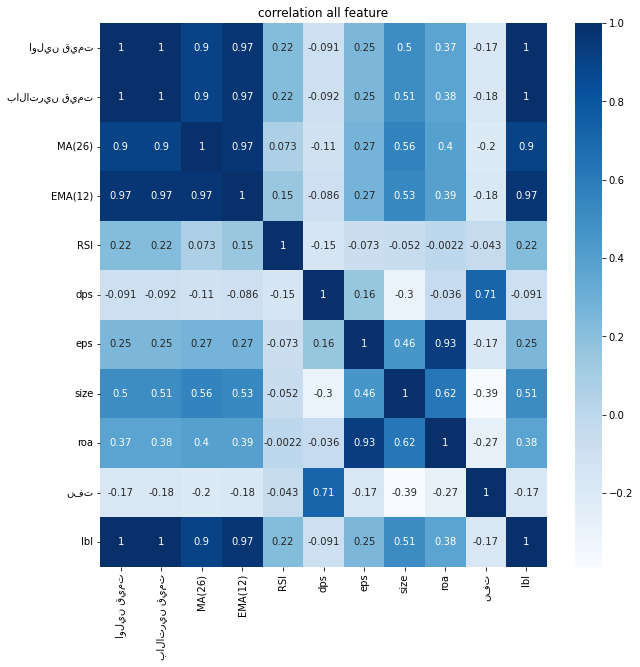

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [22]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: قيمت پيش گشايش cor: 0.0905
number: 1 , colums: MA(26) cor: 0.1744
number: 2 , colums: حجم معاملات cor: 0.2211
number: 3 , colums: آخرين قيمت cor: 0.2512
number: 4 , colums: MA(12) cor: 0.3761
number: 5 , colums: MA(5) cor: 0.5069
number: 6 , colums: كمترين قيمت cor: 0.9015
number: 7 , colums: ارزش معاملات cor: 0.9665
number: 8 , colums: اولين قيمت cor: 0.9994
number: 9 , colums: بالاترين قيمت cor: 0.9996
number: 10 , colums: EMA(12) cor: 1.0


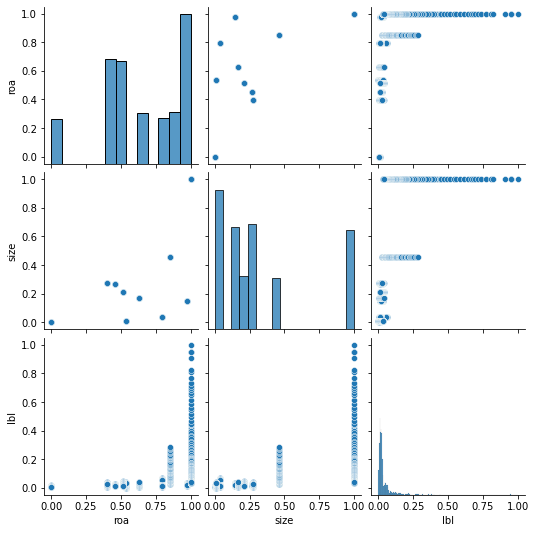

In [23]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

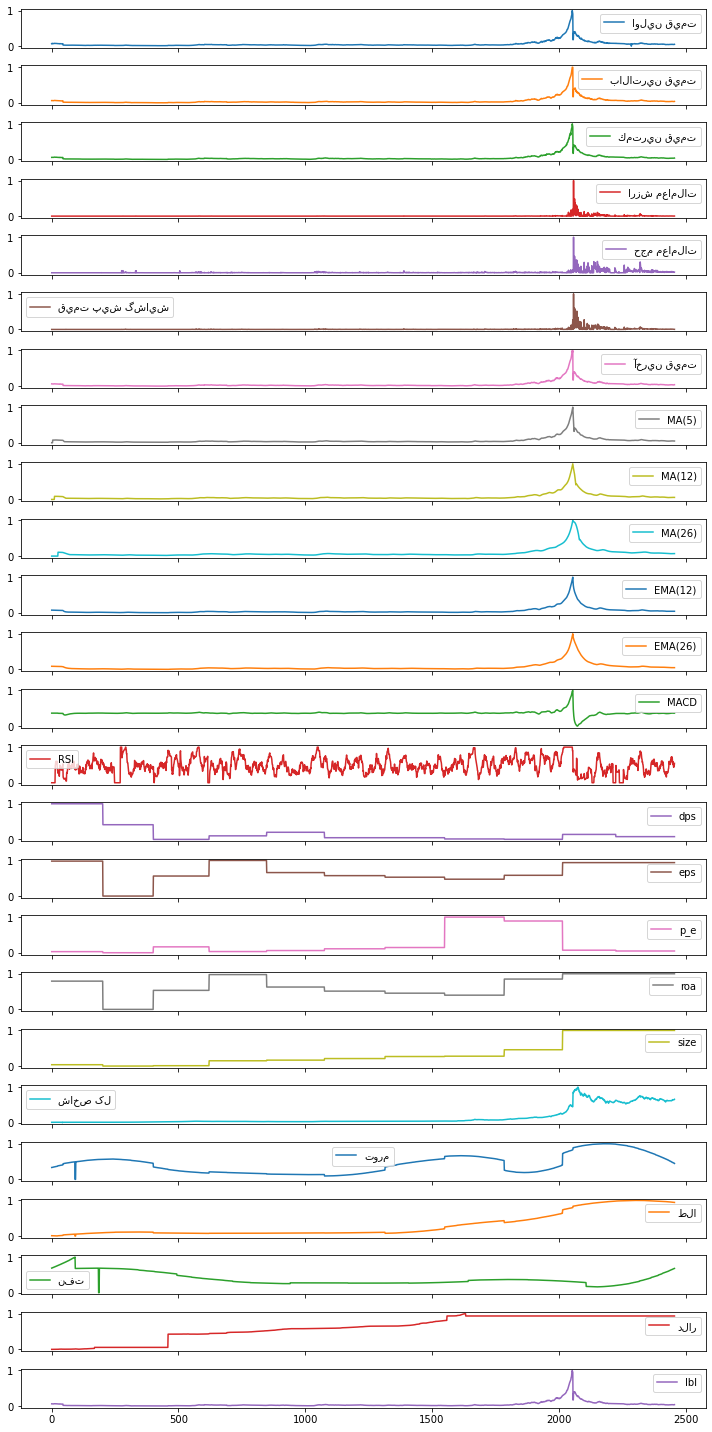

In [24]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

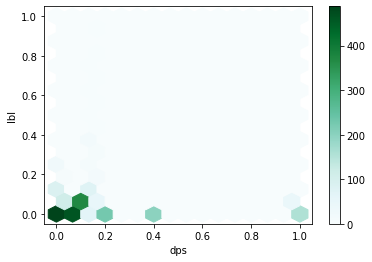

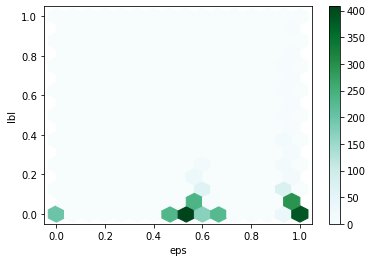

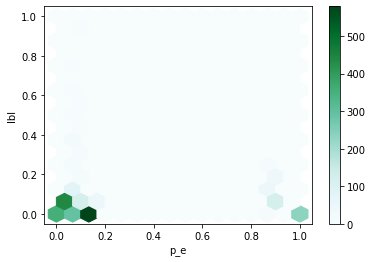

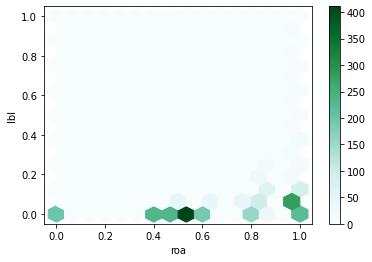

In [25]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

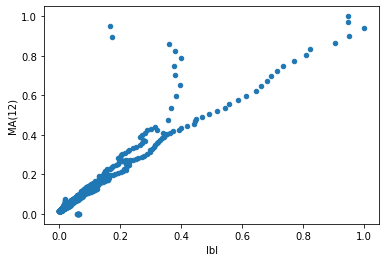

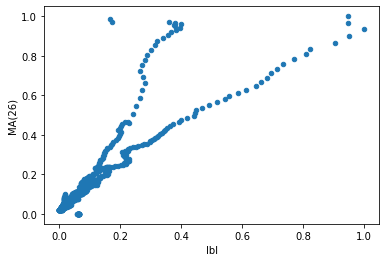

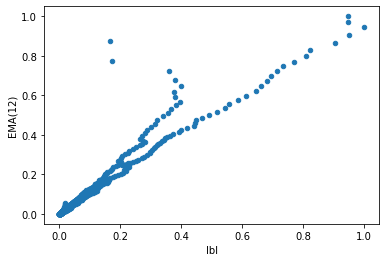

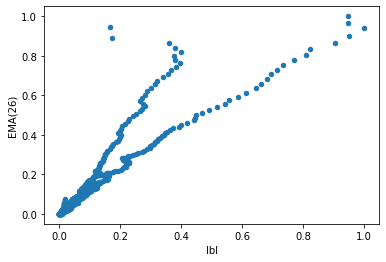

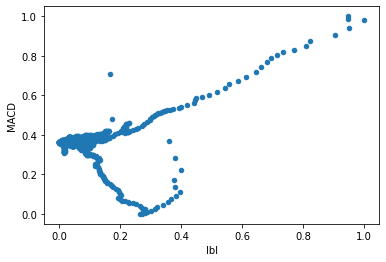

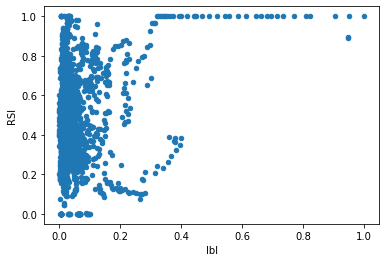

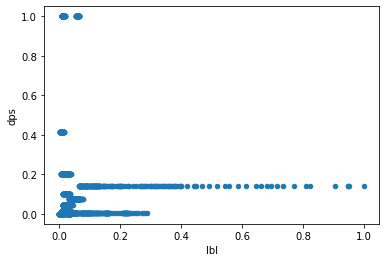

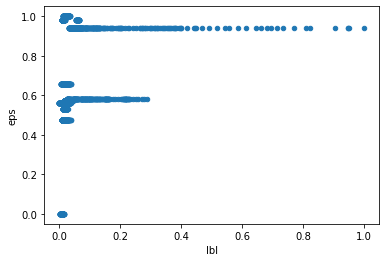

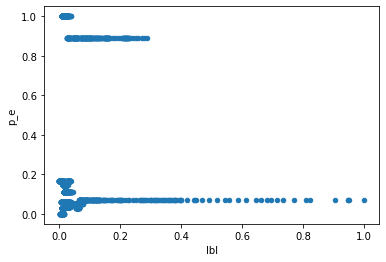

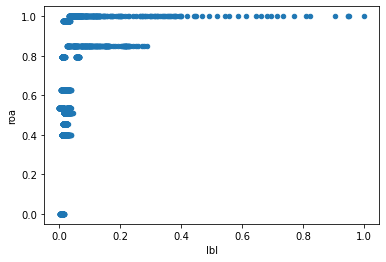

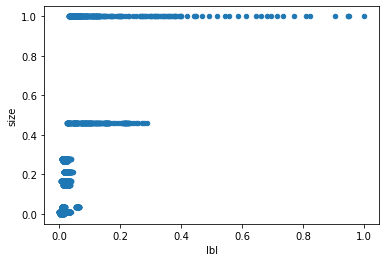

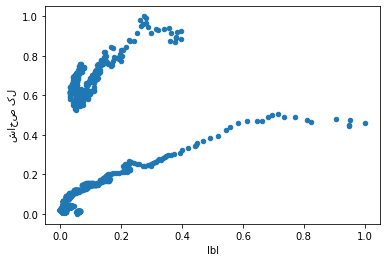

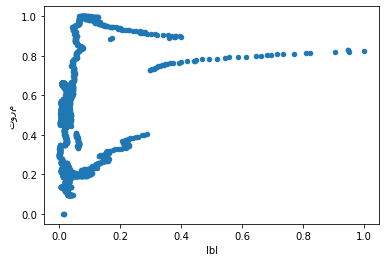

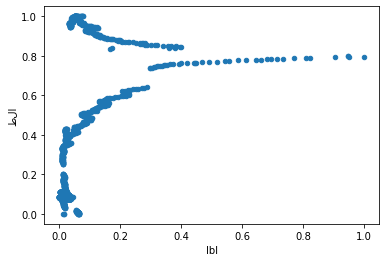

In [26]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [27]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [28]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [29]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [30]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2449, 7, 25)
-> lbl shape = (2449, 1)
__________________________________________________


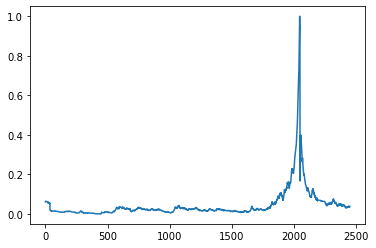

In [31]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2204, 7, 25) 
 (2204, 1) 
 (245, 7, 25) 
 (245, 1)


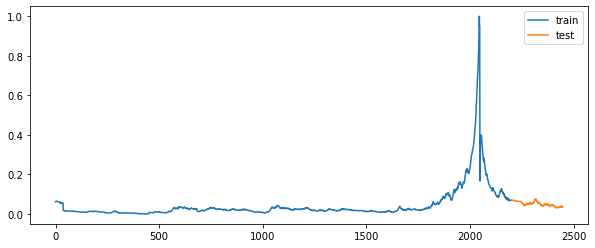

In [33]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [34]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

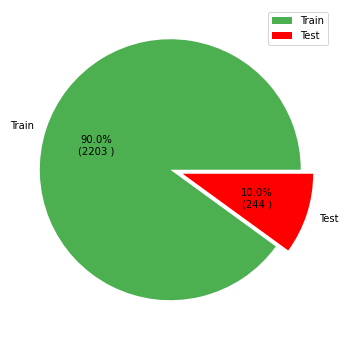

In [35]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [36]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [37]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [38]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [39]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4767.4248
 , Iteration = 1, Best Cost = 1851.3064
 , Iteration = 2, Best Cost = 930.7672
 , Iteration = 3, Best Cost = 402.9792
 , Iteration = 4, Best Cost = 177.1068
 , Iteration = 5, Best Cost = 28.8609
 , Iteration = 6, Best Cost = 14.153
 , Iteration = 7, Best Cost = 4.3358
 , Iteration = 8, Best Cost = 1.1717
 , Iteration = 9, Best Cost = 0.242


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [40]:
best_sol.Position

array([ 0.08416858, -0.00759449, -0.42362282,  0.16290194, -0.00562847,
        0.00213076,  0.05264566,  0.06159685,  0.08302674,  0.12391556])

# **8.Spotted Hyena Optimizer**

In [41]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [42]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [43]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [44]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26922.978
 , Iteration = 2, Best Cost = 26922.978
 , Iteration = 3, Best Cost = 22543.84
 , Iteration = 4, Best Cost = 21174.6117
 , Iteration = 5, Best Cost = 13032.5301
 , Iteration = 6, Best Cost = 4042.2325
 , Iteration = 7, Best Cost = 4042.2325
 , Iteration = 8, Best Cost = 1331.3144
 , Iteration = 9, Best Cost = 484.5735
 , Iteration = 10, Best Cost = 286.491


# **9.FastRNN**

## 9.1 Main code 

In [45]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [46]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [47]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## 9.3 Fianl FastRNN

In [48]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [49]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [50]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [51]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1763, 7, 25) 
 (1763, 1) 
 (441, 7, 25) 
 (441, 1)


In [52]:
# XX_train, XX_vali, yy_train, yy_vali =X_train ,X_test, y_train,y_test
# print("", XX_train.shape, "\n", yy_train.shape, 
#       "\n", XX_vali.shape, "\n", yy_vali.shape)

## 10.2 Define parameter optimal

In [53]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [54]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [55]:
def int_round(x):
  return np.int32(np.round(x))

In [56]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [57]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [58]:
# test
epochs_opti=100
batch_size_opti=256
fitness(x)

____________________________________________________________________________________________________
[ 0.01892242  0.37558408  0.90999561  4.85836828  2.05294645 -8.59993974
  2.7644734   2.317825    1.04811839 -7.28668153  6.08504422  7.33913049
  1.68796474 -8.05731399  2.25156093  2.70392273  5.67267171 17.44952699]
use_layer2 : False
use_layer3 : False
use_batchnorm : True
units1 : 128
active1 : relu
alpha1 : -8.5999
beta1 : 2.7645
units2 : 16
active2 : sigmoid
alpha2 : -7.2867
beta2 : 6.085
units3 : 512
active3 : relu
alpha3 : -8.0573
beta3 : 2.2516
dense1 : 8
dense2 : 64
drop : 0.51
....................
2.6485489384212997
____________________________________________________________________________________________________


2.6485489384212997

## 10.4 hybrid FastRNN+HOA

In [59]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [93]:
sol_opti_HOA=np.array([ 0.4504825 ,  0.36585532,  0.6670488 ,  4.95831916,  0.44878858,
       -2.68764203,  4.77656261,  3.63332866,  1.99834467, -3.68577801,
        6.04287431,  5.3243924 ,  1.10999094, -8.88880376,  3.91900161,
        6.0713341 , 11.        , 21.05724682])

In [94]:
# sol_opti_HOA=best_sol_HOA.Position

In [95]:
sol_opti_HOA

array([ 0.4504825 ,  0.36585532,  0.6670488 ,  4.95831916,  0.44878858,
       -2.68764203,  4.77656261,  3.63332866,  1.99834467, -3.68577801,
        6.04287431,  5.3243924 ,  1.10999094, -8.88880376,  3.91900161,
        6.0713341 , 11.        , 21.05724682])

## 10.5 hybrid FastRNN+SHo

In [63]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [64]:
best_sol_SHO=np.array([ 0.34217704,  0.03577834,  0.67533634,  1.68928635,  0.21055879,
       -0.3249711 ,  2.08357885,  1.99268643,  0.03435722, -6.6580215 ,
        1.32555263,  3.98788784,  0.85275055, -0.84750873,  2.59028718,
        2.48401246,  7.27232936,  2.28880968])

In [65]:
# best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 0.34217704,  0.03577834,  0.67533634,  1.68928635,  0.21055879,
       -0.3249711 ,  2.08357885,  1.99268643,  0.03435722, -6.6580215 ,
        1.32555263,  3.98788784,  0.85275055, -0.84750873,  2.59028718,
        2.48401246,  7.27232936,  2.28880968])

# **11. GAN**

In [66]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [69]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [70]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [71]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [72]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [73]:
generator = make_generator_model()

## 11.3 discriminator

In [74]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [75]:
discriminator=make_discriminator_model()

## 11.4 training function

In [76]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [77]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
           .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [78]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [79]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [80]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [81]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [82]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [83]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. Run all methods**

In [84]:
# from prettytable import PrettyTable

# # Specify the Column Names
# myTable = PrettyTable(["algorithm_name","MSE","RMSE","MAE","R2"])
# print(myTable)
myTable=[]

In [85]:
# ! pip install prettytable

## 12.1 FastRNN-Base

In [86]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_13 (Dense)            (None, 50)                1650      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                           

In [156]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
69/69 [==============================] - 3s 12ms/step - loss: 0.0098 - val_loss: 1.1203e-04
Epoch 2/100
69/69 [==============================] - 1s 7ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 3/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0029 - val_loss: 0.0065
Epoch 4/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 4.8232e-04
Epoch 5/100
69/69 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 9.2209e-05
Epoch 6/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 6.9677e-04
Epoch 7/100
69/69 [==============================] - 1s 8ms/step - loss: 9.6012e-04 - val_loss: 4.9859e-04
Epoch 8/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 3.1617e-04
Epoch 9/100
69/69 [==============================] - 1s 8ms/step - loss: 8.0190e-04 - val_loss: 2.9660e-04
Epoch 10/100
69/69 [==============================] - 1s 8ms/step - loss

In [195]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_test,verbose=0)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

[['FastRNN_Base', 0.0002, 0.0127, 0.0114, -0.3034, 0.2504]]


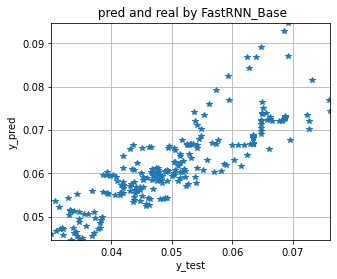

In [158]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_test)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

In [159]:
model_FastRNN_Base.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 26)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3746      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_21 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_65 (Dense)            (None, 50)                1650      
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                          

## 12.2 FastRNN-HOA

In [96]:
x=sol_opti_HOA.copy()

In [97]:
# change some value for best
x[0]=x[0]+.2
x[1]=x[1]+.2
x[2]=x[2]-0.2

In [98]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =0#array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =50
dict_fast['dense2']    =50
dict_fast['drop']      =0.1#array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : True
use_layer3 : 0
use_batchnorm : False
units1 : 128
active1 : tanh
alpha1 : -2.6876
beta1 : 4.7766
units2 : 64
active2 : relu
alpha2 : -3.6858
beta2 : 6.0429
units3 : 128
active3 : sigmoid
alpha3 : -8.8888
beta3 : 3.919
dense1 : 50
dense2 : 50
drop : 0.1
____________________________________________________________________________________________________


In [99]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 128)            39298     
                                                                 
 fastRNN_2 (RNN)             (None, 7, 64)             24642     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 50)                3250      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                           

In [134]:
# fitness(x)

In [166]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
69/69 [==============================] - 4s 14ms/step - loss: 0.0084 - val_loss: 0.0012
Epoch 2/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 5.0701e-04
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 1.8077e-04
Epoch 5/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 1.4144e-04
Epoch 6/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 6.1352e-04
Epoch 7/100
69/69 [==============================] - 1s 9ms/step - loss: 9.8006e-04 - val_loss: 9.0881e-04
Epoch 8/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 1.6384e-04
Epoch 9/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 1.7009e-04
Epoch 10/100
69/69 [==============================] - 1s 9ms/step - loss: 0

69/69 [==============================] - 1s 9ms/step - loss: 5.6108e-04 - val_loss: 1.8568e-04
Epoch 79/100
69/69 [==============================] - 1s 9ms/step - loss: 5.2856e-04 - val_loss: 8.6070e-04
Epoch 80/100
69/69 [==============================] - 1s 9ms/step - loss: 6.6870e-04 - val_loss: 2.3398e-04
Epoch 81/100
69/69 [==============================] - 1s 9ms/step - loss: 5.4714e-04 - val_loss: 1.2332e-04
Epoch 82/100
69/69 [==============================] - 1s 9ms/step - loss: 6.3061e-04 - val_loss: 1.4254e-04
Epoch 83/100
69/69 [==============================] - 1s 9ms/step - loss: 4.3664e-04 - val_loss: 6.3754e-04
Epoch 84/100
69/69 [==============================] - 1s 8ms/step - loss: 4.7883e-04 - val_loss: 4.9704e-05
Epoch 85/100
69/69 [==============================] - 1s 9ms/step - loss: 6.5797e-04 - val_loss: 1.1180e-04
Epoch 86/100
69/69 [==============================] - 1s 9ms/step - loss: 6.6068e-04 - val_loss: 8.0797e-05
Epoch 87/100
69/69 [=====================

In [196]:
from sklearn import metrics
y_pred=FastRNN_HOA.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



[['FastRNN_Base', 0.0002, 0.0127, 0.0114, -0.3034, 0.2504], ['FastRNN_HOA', 0.0004, 0.0208, 0.0198, -2.4901, 0.4343]]


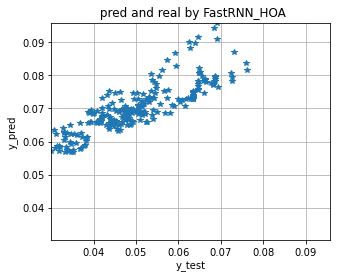

In [168]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [169]:
x=best_sol_SHO.copy()

In [170]:
x

array([ 0.34217704,  0.03577834,  0.67533634,  1.68928635,  0.21055879,
       -0.3249711 ,  2.08357885,  1.99268643,  0.03435722, -6.6580215 ,
        1.32555263,  3.98788784,  0.85275055, -0.84750873,  2.59028718,
        2.48401246,  7.27232936,  2.28880968])

In [171]:
dict_fast=dict()
dict_fast['use_layer2']      =1#array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =0#array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         ='relu'#array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   ='relu'#array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : 1
use_layer3 : False
use_batchnorm : 0
units1 : 16
active1 : relu
alpha1 : -0.325
beta1 : 2.0836
units2 : 16
active2 : relu
alpha2 : -6.658
beta2 : 1.3256
units3 : 64
active3 : sigmoid
alpha3 : -0.8475
beta3 : 2.5903
dense1 : 4
dense2 : 128
drop : 0.06
____________________________________________________________________________________________________


In [173]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 26)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 16)             1362      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 16)             1042      
                                                                 
 global_max_pooling1d_25 (Gl  (None, 16)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_76 (Dense)            (None, 4)                 68        
                                                                 
 dense_77 (Dense)            (None, 128)               640       
                                                          

In [175]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
69/69 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 1.0224e-04
Epoch 2/100
69/69 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 3.2243e-04
Epoch 3/100
69/69 [==============================] - 1s 8ms/step - loss: 9.2626e-04 - val_loss: 1.7758e-04
Epoch 4/100
69/69 [==============================] - 1s 8ms/step - loss: 9.6039e-04 - val_loss: 1.2618e-04
Epoch 5/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 7.8973e-05
Epoch 6/100
69/69 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 2.1244e-04
Epoch 7/100
69/69 [==============================] - 1s 8ms/step - loss: 9.0933e-04 - val_loss: 5.3018e-04
Epoch 8/100
69/69 [==============================] - 1s 7ms/step - loss: 8.9118e-04 - val_loss: 2.4544e-04
Epoch 9/100
69/69 [==============================] - 1s 8ms/step - loss: 9.3488e-04 - val_loss: 1.3621e-04
Epoch 10/100
69/69 [==============================] -

In [197]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,5),
                 np.round(rmse,5),
                 np.round(mae,5),
                 np.round(r2,5),
                 np.round(mape,5)
                  ])
print(myTable)


[['FastRNN_Base', 0.0002, 0.0127, 0.0114, -0.3034, 0.2504], ['FastRNN_HOA', 0.0004, 0.0208, 0.0198, -2.4901, 0.4343], ['FastRNN_SHO', 4e-05, 0.00632, 0.00511, 0.67861, 0.11167]]


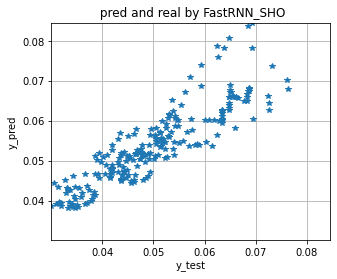

In [177]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_SHO')
plt.show()

## 12.4 GAN_Base

In [178]:
EPOCHS = 1000

In [179]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)







Time for epoch 1  Generator Loss: 0.7080230116844177,  Discriminator_loss: 1.381597638130188
Time for epoch 2  Generator Loss: 0.7111304998397827,  Discriminator_loss: 1.3787556886672974
Time for epoch 3  Generator Loss: 0.714223325252533,  Discriminator_loss: 1.374585509300232
Time for epoch 4  Generator Loss: 0.7124227285385132,  Discriminator_loss: 1.3758610486984253
Time for epoch 5  Generator Loss: 0.7069217562675476,  Discriminator_loss: 1.3775227069854736
Time for epoch 6  Generator Loss: 0.7014268636703491,  Discriminator_loss: 1.379243016242981
Time for epoch 7  Generator Loss: 0.6982205510139465,  Discriminator_loss: 1.3795466423034668
Time for epoch 8  Generator Loss: 0.6963494420051575,  Discriminator_loss: 1.38113272190094
Time for epoch 9  Generator Loss: 0.6982751488685608,  Discriminator_loss: 1.3780995607376099
Time for epoch 10  Generator Loss: 0.7009114623069763,  Discriminator_loss: 1.3775157928466797
Time for epoch 11  Generator Loss: 0.6954396963119507,  Discrimin

Time for epoch 88  Generator Loss: 0.6885161995887756,  Discriminator_loss: 1.3851863145828247
Time for epoch 89  Generator Loss: 0.6909517049789429,  Discriminator_loss: 1.38485848903656
Time for epoch 90  Generator Loss: 0.6857240200042725,  Discriminator_loss: 1.387259602546692
Time for epoch 91  Generator Loss: 0.6854899525642395,  Discriminator_loss: 1.3861262798309326
Time for epoch 92  Generator Loss: 0.6893277168273926,  Discriminator_loss: 1.383458137512207
Time for epoch 93  Generator Loss: 0.6874845623970032,  Discriminator_loss: 1.3857929706573486
Time for epoch 94  Generator Loss: 0.6881526112556458,  Discriminator_loss: 1.3854527473449707
Time for epoch 95  Generator Loss: 0.6879684329032898,  Discriminator_loss: 1.3850184679031372
Time for epoch 96  Generator Loss: 0.6882984638214111,  Discriminator_loss: 1.3853727579116821
Time for epoch 97  Generator Loss: 0.6894196271896362,  Discriminator_loss: 1.3834811449050903
Time for epoch 98  Generator Loss: 0.6883769035339355,

Time for epoch 174  Generator Loss: 0.6861578226089478,  Discriminator_loss: 1.3865294456481934
Time for epoch 175  Generator Loss: 0.687434196472168,  Discriminator_loss: 1.3849844932556152
Time for epoch 176  Generator Loss: 0.687385618686676,  Discriminator_loss: 1.3850997686386108
Time for epoch 177  Generator Loss: 0.6867578029632568,  Discriminator_loss: 1.3859641551971436
Time for epoch 178  Generator Loss: 0.6876503825187683,  Discriminator_loss: 1.3853130340576172
Time for epoch 179  Generator Loss: 0.6873101592063904,  Discriminator_loss: 1.385860800743103
Time for epoch 180  Generator Loss: 0.6884565353393555,  Discriminator_loss: 1.3846979141235352
Time for epoch 181  Generator Loss: 0.6863077282905579,  Discriminator_loss: 1.3864898681640625
Time for epoch 182  Generator Loss: 0.687423586845398,  Discriminator_loss: 1.3866806030273438
Time for epoch 183  Generator Loss: 0.687389612197876,  Discriminator_loss: 1.386562705039978
Time for epoch 184  Generator Loss: 0.68706929

Time for epoch 260  Generator Loss: 0.6866389513015747,  Discriminator_loss: 1.3855376243591309
Time for epoch 261  Generator Loss: 0.6874208450317383,  Discriminator_loss: 1.3851385116577148
Time for epoch 262  Generator Loss: 0.686161458492279,  Discriminator_loss: 1.388000249862671
Time for epoch 263  Generator Loss: 0.6856051087379456,  Discriminator_loss: 1.387168049812317
Time for epoch 264  Generator Loss: 0.687908947467804,  Discriminator_loss: 1.3844873905181885
Time for epoch 265  Generator Loss: 0.6878378391265869,  Discriminator_loss: 1.3854249715805054
Time for epoch 266  Generator Loss: 0.6866602301597595,  Discriminator_loss: 1.3860960006713867
Time for epoch 267  Generator Loss: 0.6864164471626282,  Discriminator_loss: 1.3865926265716553
Time for epoch 268  Generator Loss: 0.6877253651618958,  Discriminator_loss: 1.385347843170166
Time for epoch 269  Generator Loss: 0.686296284198761,  Discriminator_loss: 1.386446237564087
Time for epoch 270  Generator Loss: 0.685767531

Time for epoch 346  Generator Loss: 0.6867253184318542,  Discriminator_loss: 1.3861161470413208
Time for epoch 347  Generator Loss: 0.6862000226974487,  Discriminator_loss: 1.3855018615722656
Time for epoch 348  Generator Loss: 0.6859934329986572,  Discriminator_loss: 1.3871387243270874
Time for epoch 349  Generator Loss: 0.6866180896759033,  Discriminator_loss: 1.3860578536987305
Time for epoch 350  Generator Loss: 0.6873902082443237,  Discriminator_loss: 1.3857651948928833
Time for epoch 351  Generator Loss: 0.6859870553016663,  Discriminator_loss: 1.3865628242492676
Time for epoch 352  Generator Loss: 0.6856191158294678,  Discriminator_loss: 1.387067198753357
Time for epoch 353  Generator Loss: 0.6872261166572571,  Discriminator_loss: 1.3851490020751953
Time for epoch 354  Generator Loss: 0.6865649819374084,  Discriminator_loss: 1.3866610527038574
Time for epoch 355  Generator Loss: 0.6873742341995239,  Discriminator_loss: 1.3852474689483643
Time for epoch 356  Generator Loss: 0.687

Time for epoch 432  Generator Loss: 0.6862448453903198,  Discriminator_loss: 1.3862653970718384
Time for epoch 433  Generator Loss: 0.6876559853553772,  Discriminator_loss: 1.3844382762908936
Time for epoch 434  Generator Loss: 0.6864772439002991,  Discriminator_loss: 1.3855295181274414
Time for epoch 435  Generator Loss: 0.686776876449585,  Discriminator_loss: 1.3860658407211304
Time for epoch 436  Generator Loss: 0.6871791481971741,  Discriminator_loss: 1.3855139017105103
Time for epoch 437  Generator Loss: 0.6876428723335266,  Discriminator_loss: 1.3855887651443481
Time for epoch 438  Generator Loss: 0.6865583062171936,  Discriminator_loss: 1.3868699073791504
Time for epoch 439  Generator Loss: 0.6870167851448059,  Discriminator_loss: 1.385502815246582
Time for epoch 440  Generator Loss: 0.6867678165435791,  Discriminator_loss: 1.3861175775527954
Time for epoch 441  Generator Loss: 0.6866773366928101,  Discriminator_loss: 1.3870363235473633
Time for epoch 442  Generator Loss: 0.6870

Time for epoch 518  Generator Loss: 0.6868595480918884,  Discriminator_loss: 1.386950135231018
Time for epoch 519  Generator Loss: 0.6884862780570984,  Discriminator_loss: 1.3848762512207031
Time for epoch 520  Generator Loss: 0.6875076293945312,  Discriminator_loss: 1.385850191116333
Time for epoch 521  Generator Loss: 0.6875939965248108,  Discriminator_loss: 1.384814739227295
Time for epoch 522  Generator Loss: 0.688295841217041,  Discriminator_loss: 1.3846185207366943
Time for epoch 523  Generator Loss: 0.686866283416748,  Discriminator_loss: 1.3869017362594604
Time for epoch 524  Generator Loss: 0.6869615912437439,  Discriminator_loss: 1.385909080505371
Time for epoch 525  Generator Loss: 0.6873608231544495,  Discriminator_loss: 1.3846937417984009
Time for epoch 526  Generator Loss: 0.6884342432022095,  Discriminator_loss: 1.3850489854812622
Time for epoch 527  Generator Loss: 0.6877945065498352,  Discriminator_loss: 1.3857704401016235
Time for epoch 528  Generator Loss: 0.68796324

Time for epoch 604  Generator Loss: 0.6881663203239441,  Discriminator_loss: 1.3860284090042114
Time for epoch 605  Generator Loss: 0.6874043345451355,  Discriminator_loss: 1.3866437673568726
Time for epoch 606  Generator Loss: 0.6866201162338257,  Discriminator_loss: 1.3863390684127808
Time for epoch 607  Generator Loss: 0.6874917149543762,  Discriminator_loss: 1.3855410814285278
Time for epoch 608  Generator Loss: 0.6882597208023071,  Discriminator_loss: 1.3859705924987793
Time for epoch 609  Generator Loss: 0.6894884705543518,  Discriminator_loss: 1.3844454288482666
Time for epoch 610  Generator Loss: 0.6882971525192261,  Discriminator_loss: 1.3850390911102295
Time for epoch 611  Generator Loss: 0.6872217655181885,  Discriminator_loss: 1.3854175806045532
Time for epoch 612  Generator Loss: 0.6895699501037598,  Discriminator_loss: 1.3839982748031616
Time for epoch 613  Generator Loss: 0.6884611248970032,  Discriminator_loss: 1.3854923248291016
Time for epoch 614  Generator Loss: 0.68

Time for epoch 690  Generator Loss: 0.6871112585067749,  Discriminator_loss: 1.3865056037902832
Time for epoch 691  Generator Loss: 0.6869630217552185,  Discriminator_loss: 1.3855575323104858
Time for epoch 692  Generator Loss: 0.6875110864639282,  Discriminator_loss: 1.3856781721115112
Time for epoch 693  Generator Loss: 0.6882461309432983,  Discriminator_loss: 1.3849576711654663
Time for epoch 694  Generator Loss: 0.6883577704429626,  Discriminator_loss: 1.3848671913146973
Time for epoch 695  Generator Loss: 0.6874781847000122,  Discriminator_loss: 1.3855139017105103
Time for epoch 696  Generator Loss: 0.6884588003158569,  Discriminator_loss: 1.3858317136764526
Time for epoch 697  Generator Loss: 0.6877400279045105,  Discriminator_loss: 1.3852498531341553
Time for epoch 698  Generator Loss: 0.6878760457038879,  Discriminator_loss: 1.384313941001892
Time for epoch 699  Generator Loss: 0.6865803003311157,  Discriminator_loss: 1.3864871263504028
Time for epoch 700  Generator Loss: 0.687

Time for epoch 776  Generator Loss: 0.6886888742446899,  Discriminator_loss: 1.3856881856918335
Time for epoch 777  Generator Loss: 0.6877240538597107,  Discriminator_loss: 1.3857818841934204
Time for epoch 778  Generator Loss: 0.6878414750099182,  Discriminator_loss: 1.3847761154174805
Time for epoch 779  Generator Loss: 0.6883885860443115,  Discriminator_loss: 1.3853116035461426
Time for epoch 780  Generator Loss: 0.6887893080711365,  Discriminator_loss: 1.3845475912094116
Time for epoch 781  Generator Loss: 0.6896018385887146,  Discriminator_loss: 1.3842681646347046
Time for epoch 782  Generator Loss: 0.6877858638763428,  Discriminator_loss: 1.3852741718292236
Time for epoch 783  Generator Loss: 0.6884604096412659,  Discriminator_loss: 1.385362148284912
Time for epoch 784  Generator Loss: 0.6889625191688538,  Discriminator_loss: 1.3840512037277222
Time for epoch 785  Generator Loss: 0.6894565224647522,  Discriminator_loss: 1.3836315870285034
Time for epoch 786  Generator Loss: 0.688

Time for epoch 862  Generator Loss: 0.6898257732391357,  Discriminator_loss: 1.3817839622497559
Time for epoch 863  Generator Loss: 0.6901930570602417,  Discriminator_loss: 1.3830450773239136
Time for epoch 864  Generator Loss: 0.6908961534500122,  Discriminator_loss: 1.3822013139724731
Time for epoch 865  Generator Loss: 0.6904966831207275,  Discriminator_loss: 1.3823362588882446
Time for epoch 866  Generator Loss: 0.6917861700057983,  Discriminator_loss: 1.3813377618789673
Time for epoch 867  Generator Loss: 0.6891891360282898,  Discriminator_loss: 1.3841822147369385
Time for epoch 868  Generator Loss: 0.6880767941474915,  Discriminator_loss: 1.3838483095169067
Time for epoch 869  Generator Loss: 0.6894389986991882,  Discriminator_loss: 1.3851779699325562
Time for epoch 870  Generator Loss: 0.6892849206924438,  Discriminator_loss: 1.3841807842254639
Time for epoch 871  Generator Loss: 0.6868066787719727,  Discriminator_loss: 1.3863131999969482
Time for epoch 872  Generator Loss: 0.68

Time for epoch 948  Generator Loss: 0.6869836449623108,  Discriminator_loss: 1.3873686790466309
Time for epoch 949  Generator Loss: 0.6908472180366516,  Discriminator_loss: 1.3823174238204956
Time for epoch 950  Generator Loss: 0.6880915760993958,  Discriminator_loss: 1.3858332633972168
Time for epoch 951  Generator Loss: 0.6911008954048157,  Discriminator_loss: 1.3810807466506958
Time for epoch 952  Generator Loss: 0.6879556179046631,  Discriminator_loss: 1.3852332830429077
Time for epoch 953  Generator Loss: 0.6881125569343567,  Discriminator_loss: 1.3842146396636963
Time for epoch 954  Generator Loss: 0.6886217594146729,  Discriminator_loss: 1.3820929527282715
Time for epoch 955  Generator Loss: 0.6894084811210632,  Discriminator_loss: 1.3849303722381592
Time for epoch 956  Generator Loss: 0.6897833943367004,  Discriminator_loss: 1.3853777647018433
Time for epoch 957  Generator Loss: 0.6879072189331055,  Discriminator_loss: 1.3848317861557007
Time for epoch 958  Generator Loss: 0.68

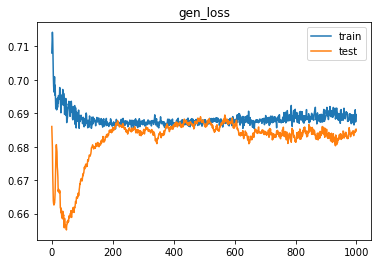

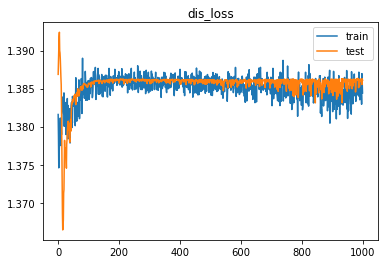

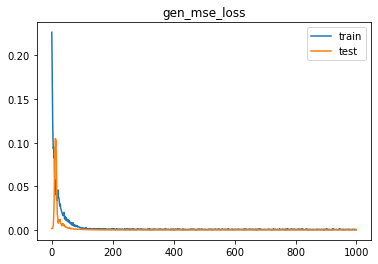

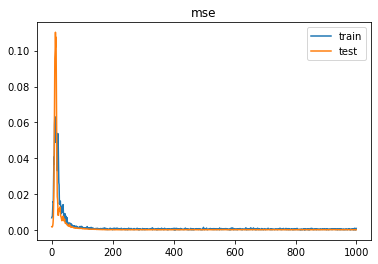

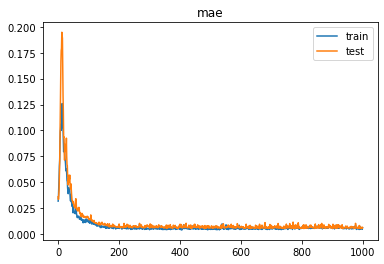

In [180]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


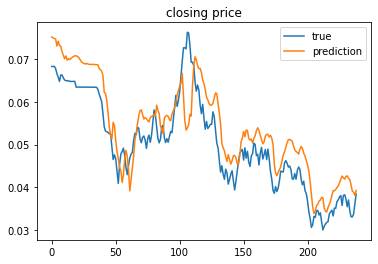

In [199]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_test)):
  sequence, target = data_gen_test[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [200]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,5),
                 np.round(rmse,5),
                 np.round(mae,5),
                 np.round(r2,5),
                 np.round(mape,5)
                  ])
print(myTable)





[['FastRNN_Base', 0.0002, 0.0127, 0.0114, -0.3034, 0.2504], ['FastRNN_HOA', 0.0004, 0.0208, 0.0198, -2.4901, 0.4343], ['FastRNN_SHO', 4e-05, 0.00632, 0.00511, 0.67861, 0.11167], ['GAN_Base', 4e-05, 0.0062, 0.00529, 0.67693, 0.10775]]


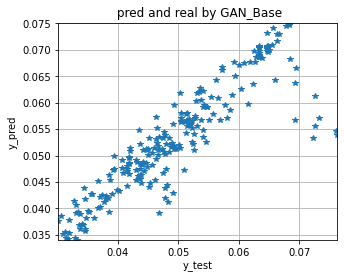

In [183]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [184]:
y_pred_GAN=y_pred

# **13. Final Result**

In [201]:
myTable=np.array(myTable)
print(myTable)

[['FastRNN_Base' '0.0002' '0.0127' '0.0114' '-0.3034' '0.2504']
 ['FastRNN_HOA' '0.0004' '0.0208' '0.0198' '-2.4901' '0.4343']
 ['FastRNN_SHO' '4e-05' '0.00632' '0.00511' '0.67861' '0.11167']
 ['GAN_Base' '4e-05' '0.0062' '0.00529' '0.67693' '0.10775']]


In [202]:

data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

,algorithm_name,MSE,RMSE,MAE,MAPE,R2
0,FastRNN_Base,0.00020,0.01270,0.01140,0.25040,-0.30340
1,FastRNN_HOA,0.00040,0.02080,0.01980,0.43430,-2.49010
2,FastRNN_SHO,0.00004,0.00632,0.00511,0.11167,0.67861
3,GAN_Base,0.00004,0.00620,0.00529,0.10775,0.67693


In [203]:
data_res.to_excel('out_5.xlsx')

In [189]:
# tbl_as_csv = myTable.get_csv_string().replace('\r','')
# text_file = open("output_all.csv", "w")
# n = text_file.write(tbl_as_csv)
# text_file.close()
# data_res_metric=pd.read_csv("output_all.csv")
# data_res_metric

In [190]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [191]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

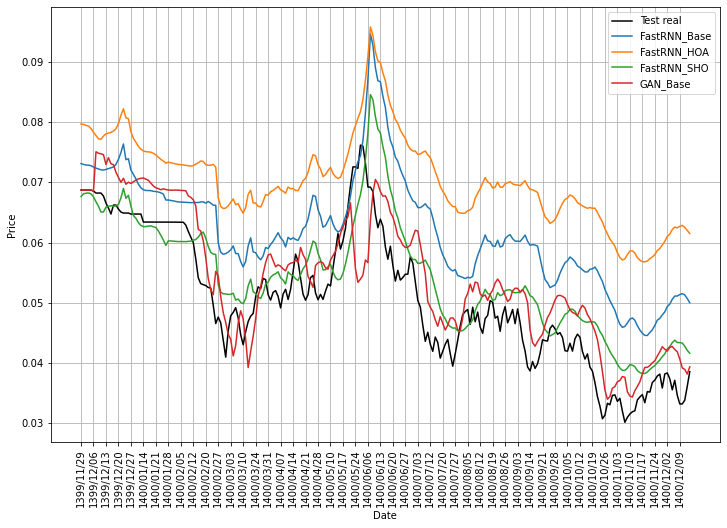

In [192]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [193]:
import pickle
filename = 'fastrnn_5.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_5.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_5.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_5.pkl'
pickle.dump(generator, open(filename, 'wb'))